In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [23]:
df = pd.read_csv('./imdb-top-250.csv')

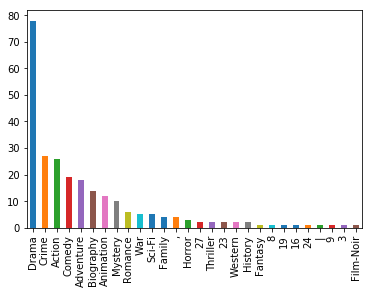

In [24]:
df['genre'].value_counts().plot.bar()

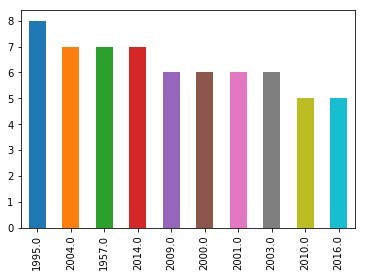

In [25]:
df['year'].value_counts().head(10).plot.bar()

In [26]:
df

,rank,title,year,link,linkMeta,rating,duration,genre,metadate,summarytext,creditsInfo,storyline
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,The Shawshank Redemption,1994.0,https://www.imdb.com/title/tt0111161/?pf_rd_m=...,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",A,2h22min,Drama,"['A', '|', '2h', '22min', '|', 'Drama', '|', '...",Two imprisoned men bond over a number of years...,"[<div class=""credit_summary_item"">\n<h4 class=...",Chronicles the experiences of a formerly s...
2,2.0,The Godfather,1972.0,https://www.imdb.com/title/tt0068646/?pf_rd_m=...,"Francis Ford Coppola (dir.), Marlon Brando, Al...",A,2h55min,Crime,"['A', '|', '2h', '55min', '|', 'Crime', ',', '...",The aging patriarch of an organized crime dyna...,"[<div class=""credit_summary_item"">\n<h4 class=...",When the aging head of a famous crime fami...
3,3.0,The Godfather: Part II,1974.0,https://www.imdb.com/title/tt0071562/?pf_rd_m=...,"Francis Ford Coppola (dir.), Al Pacino, Robert...",3h,|Crime,Drama,"['3h', '22min', '|', 'Crime', ',', 'Drama', '|...",The early life and career of Vito Corleone in ...,"[<div class=""credit_summary_item"">\n<h4 class=...",The continuing saga of the Corleone crime ...
4,4.0,The Dark Knight,2008.0,https://www.imdb.com/title/tt0468569/?pf_rd_m=...,"Christopher Nolan (dir.), Christian Bale, Heat...",UA,2h32min,Action,"['UA', '|', '2h', '32min', '|', 'Action', ',',...",When the menace known as the Joker emerges fro...,"[<div class=""credit_summary_item"">\n<h4 class=...",Set within a year after the events of Batm...
5,5.0,12 Angry Men,1957.0,https://www.imdb.com/title/tt0050083/?pf_rd_m=...,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",1h,|Crime,Drama,"['1h', '36min', '|', 'Crime', ',', 'Drama', '|...",A jury holdout attempts to prevent a miscarria...,"[<div class=""credit_summary_item"">\n<h4 class=...",The defense and the prosecution have reste...
6,6.0,Schindler's List,1993.0,https://www.imdb.com/title/tt0108052/?pf_rd_m=...,"Steven Spielberg (dir.), Liam Neeson, Ralph Fi...",A,3h15min,Biography,"['A', '|', '3h', '15min', '|', 'Biography', ',...","In German-occupied Poland during World War II,...","[<div class=""credit_summary_item"">\n<h4 class=...",Oskar Schindler is a vainglorious and gree...
7,7.0,The Lord of the Rings: The Return of the King,2003.0,https://www.imdb.com/title/tt0167260/?pf_rd_m=...,"Peter Jackson (dir.), Elijah Wood, Viggo Morte...",PG-13,3h21min,Action,"['PG-13', '|', '3h', '21min', '|', 'Action', '...",Gandalf and Aragorn lead the World of Men agai...,"[<div class=""credit_summary_item"">\n<h4 class=...",The final confrontation between the forces...
8,8.0,Pulp Fiction,1994.0,https://www.imdb.com/title/tt0110912/?pf_rd_m=...,"Quentin Tarantino (dir.), John Travolta, Uma T...",A,2h34min,Crime,"['A', '|', '2h', '34min', '|', 'Crime', ',', '...","The lives of two mob hit-men, a boxer, a gangs...","[<div class=""credit_summary_item"">\n<h4 class=...",Jules Winnfield (Samuel L. Jackson) and Vi...
9,9.0,"Il buono, il brutto, il cattivo",1966.0,https://www.imdb.com/title/tt0060196/?pf_rd_m=...,"Sergio Leone (dir.), Clint Eastwood, Eli Wallach",2h,|Western,23,"['2h', '41min', '|', 'Western', '|', '23', 'De...",A bounty hunting scam joins two men in an unea...,"[<div class=""credit_summary_item"">\n<h4 class=...",Blondie (The Good) is a professional gunsl...


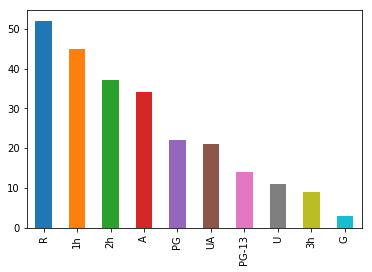

In [27]:
df['rating'].value_counts().head(10).plot.bar()

In [39]:
wordcloud = WordCloud().generate(df['storyline'].str.join(''))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object

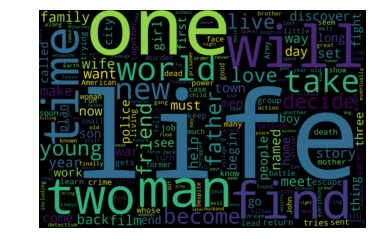

In [79]:
res = ''
for x in df['storyline']:
    res += ' ' + str(x).strip()

wordcloud = WordCloud(width=1500, height=1000, stopwords = STOPWORDS).generate(res)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()